# **Group Members:**
- Mohammad Anas 20L-1289
- Fatima Azfar 20L-1027
<br>
- Section: BDS-8A <br>
- Fundamentals of Computer Vision - Assignment 1


# **Importing Required Modules**

In [1]:
import cv2
import matplotlib.pyplot as plt

# **1- Loading the image**

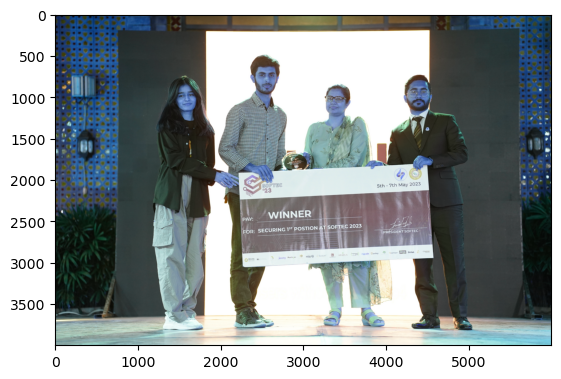

In [2]:
def load_image(filname):
    """
        Function to load the image from the file
    """
    image = cv2.imread(filname)
    gray_scaled = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image
    
def display_image(image):
    """_
        Function to display the image
    """
    plt.imshow(image)
    plt.show()
    
filename = 'DSC05128.JPG'
image = load_image(filename)
display_image(image)

# **2- Subsetting the image**

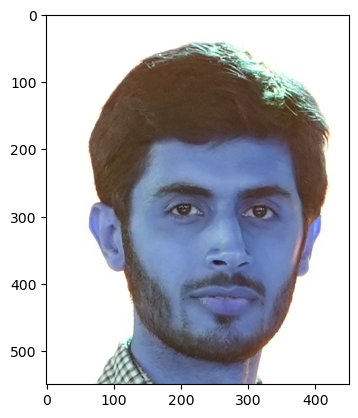

In [3]:
def subsetting(image):
    """
        Function to subset the image
    """
    subset = image[450:1000, 2300:2750]
    return subset

subset = subsetting(image)
display_image(subset)

# **3- Function to overlap the images**

In [4]:
def overlap_images(image1, image2, coordinates):
    """
    Overlap a smaller image onto a larger one at the given coordinates.

    Args:
        image1 (numpy.ndarray): The larger background image.
        image2 (numpy.ndarray): The smaller image to be overlapped onto the background.
        coordinates (tuple): Coordinates (row, column) where the top-left corner of image2
                             should be placed on image1.

    Returns:
        numpy.ndarray: The resulting image after overlapping image2 onto image1.
    """
    # image1 should be greater than image2
    assert(image1.shape[0] >= image2.shape[0]) 
    assert(image1.shape[1] >= image2.shape[1])
    
    # coordinates should be within range of image1
    assert(coordinates[0] + image2.shape[0] <= image1.shape[0])
    assert(coordinates[1] + image2.shape[1] <= image1.shape[1])

    row_start, row_end = coordinates[0], coordinates[0] + image2.shape[0]
    col_start, col_end = coordinates[1], coordinates[1] + image2.shape[1]
    image1[row_start:row_end, col_start:col_end] = image2

    return image1


# **4- Inserting subset in differnt locations**

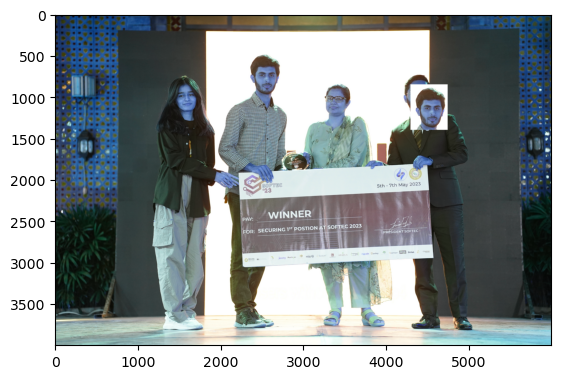

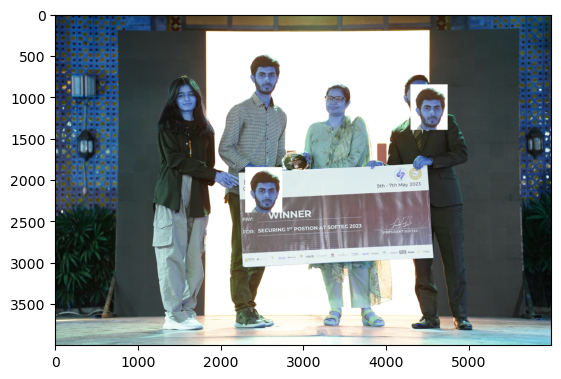

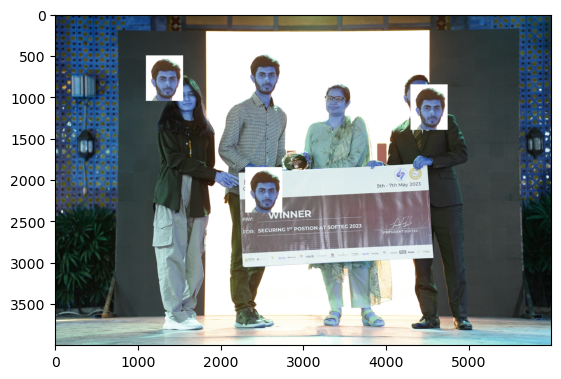

In [5]:
overlapped = overlap_images(image, subset, (850, 4300))
display_image(overlapped)

overlapped = overlap_images(image, subset, (1850, 2300))
display_image(overlapped)

overlapped = overlap_images(image, subset, (500, 1100))
display_image(overlapped)

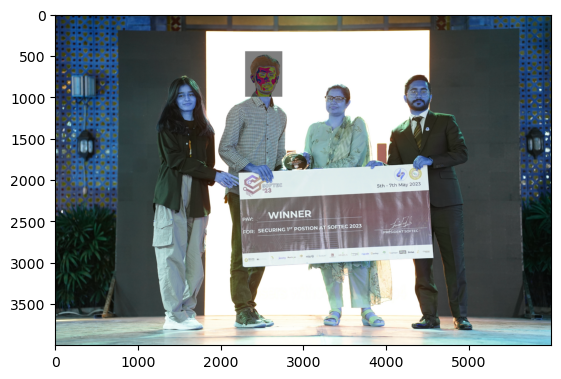

In [6]:
def blend_images(image1, image2, coordinates):
    """
    Blend a smaller image onto a larger one at the given coordinates by averaging pixel values.

    Args:
        image1 (numpy.ndarray): The larger background image.
        image2 (numpy.ndarray): The smaller image to be blended onto the background.
        coordinates (tuple): Coordinates (row, column) where the top-left corner of image2
                             should be placed on image1.

    Returns:
        numpy.ndarray: The resulting image after blending image2 onto image1.
    """
    
    # image1 should be greater than image2
    assert(image1.shape[0] >= image2.shape[0]) 
    assert(image1.shape[1] >= image2.shape[1])
    
    # coordinates should be within range of image1
    assert(coordinates[0] + image2.shape[0] <= image1.shape[0])
    assert(coordinates[1] + image2.shape[1] <= image1.shape[1])

    row_start, row_end = coordinates[0], coordinates[0] + image2.shape[0]
    col_start, col_end = coordinates[1], coordinates[1] + image2.shape[1]
    roi = image1.copy()
    roi[row_start:row_end, col_start:col_end] = (image1[row_start:row_end, col_start:col_end] + image2) // 2

    return roi

image = load_image('DSC05128.JPG')
blended = blend_images(image, subset, (450, 2300))
display_image(blended)